# On the evolution of a large class of inhomogeneous scalar-field cosmologies by Ibanez & Olasagasti
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 22, 2021

TO DO:  figure out how to define stress energy tensor

https://arxiv.org/abs/gr-qc/9803078

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,x,y,z,dt,dx,dy,dz = symbols( 't x y z dt dx dy dz' ) 

In [4]:
F = Function('F')(t,z)
F

In [5]:
G = Function('G')(t,z)
G

In [6]:
p = Function('p')(t,z)
p

In [7]:
variables = Matrix( [t,x,y,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,dx,dy,dz] ) 
differentials

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [10]:
lineElement = expand(exp(F) * (-dt**2 + dz**2) + G*( exp(p)*dx**2 + exp(-p)*dy**2 ))
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  F(t, z)                                               ⎤
⎢-ℯ                0                  0             0    ⎥
⎢                                                        ⎥
⎢                    p(t, z)                             ⎥
⎢    0      G(t, z)⋅ℯ                 0             0    ⎥
⎢                                                        ⎥
⎢                                      -p(t, z)          ⎥
⎢    0             0          G(t, z)⋅ℯ             0    ⎥
⎢                                                        ⎥
⎢                                                 F(t, z)⎥
⎣    0             0                  0          ℯ       ⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡  F(t, z)                                               ⎤
⎢-ℯ                0                  0             0    ⎥
⎢                                                        ⎥
⎢                    p(t, z)                             ⎥
⎢    0      G(t, z)⋅ℯ                 0             0    ⎥
⎢                                                        ⎥
⎢                                      -p(t, z)          ⎥
⎢    0             0          G(t, z)⋅ℯ             0    ⎥
⎢                                                        ⎥
⎢                                                 F(t, z)⎥
⎣    0             0                  0          ℯ       ⎦

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡∂                                                                                         
⎢⎢──(F(t, z))                                                                               
⎢⎢∂t                                                                                        
⎢⎢───────────                                   0                                           
⎢⎢     2                                                                                    
⎢⎢                                                                                          
⎢⎢              ⎛           p(t, z) ∂              p(t, z) ∂          ⎞  -F(t, z)           
⎢⎢             -⎜- G(t, z)⋅ℯ       ⋅──(p(t, z)) - ℯ       ⋅──(G(t, z))⎟⋅ℯ                   
⎢⎢              ⎝                   ∂t                     ∂t         ⎠                     
⎢⎢     0       ───────────────────────────────────────────────────────────────────          
⎢⎢                                              2                     

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛                                                        2         ⎞           ⎛    2      
⎢⎜∂           ∂             ∂           ∂                ∂          ⎟           ⎜   ∂       
⎢⎜──(F(t, z))⋅──(G(t, z)) + ──(F(t, z))⋅──(G(t, z)) - 2⋅───(G(t, z))⎟⋅G(t, z) + ⎜- ───(F(t, 
⎢⎜∂t          ∂t            ∂z          ∂z                2         ⎟           ⎜    2      
⎢⎝                                                      ∂t          ⎠           ⎝  ∂t       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                           2               
⎢                                                                        2⋅G (t, z)         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

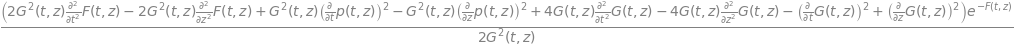

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛                                                        2         ⎞           ⎛    2      
⎢⎜∂           ∂             ∂           ∂                ∂          ⎟           ⎜   ∂       
⎢⎜──(F(t, z))⋅──(G(t, z)) + ──(F(t, z))⋅──(G(t, z)) - 2⋅───(G(t, z))⎟⋅G(t, z) + ⎜- ───(F(t, 
⎢⎜∂t          ∂t            ∂z          ∂z                2         ⎟           ⎜    2      
⎢⎝                                                      ∂t          ⎠           ⎝  ∂t       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                           2               
⎢                                                                        2⋅G (t, z)         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡⎛                                                        2         ⎞           ⎛    2      
⎢⎜∂           ∂             ∂           ∂                ∂          ⎟           ⎜   ∂       
⎢⎜──(F(t, z))⋅──(G(t, z)) + ──(F(t, z))⋅──(G(t, z)) - 2⋅───(G(t, z))⎟⋅G(t, z) + ⎜- ───(F(t, 
⎢⎜∂t          ∂t            ∂z          ∂z                2         ⎟           ⎜    2      
⎢⎝                                                      ∂t          ⎠           ⎝  ∂t       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                           2               
⎢                                                                        2⋅G (t, z)         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [21]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                  ∂           ∂                 ∂          
⎢                    2                     2   0.5⋅──(F(t, z))⋅──(G(t, z))   0.5⋅──(F(t, z))
⎢       ⎛∂          ⎞         ⎛∂          ⎞        ∂t          ∂t                ∂z         
⎢- 0.25⋅⎜──(p(t, z))⎟  - 0.25⋅⎜──(p(t, z))⎟  + ─────────────────────────── + ───────────────
⎢       ⎝∂t         ⎠         ⎝∂z         ⎠              G(t, z)                       G(t, 
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     